In [10]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit


## Importing Raw data and getting country-wide stats

In [11]:
raw_data = pd.read_csv('covid_19_data.csv')
del raw_data['Province/State']
del raw_data['SNo']
del raw_data['Last Update']

raw_data['ObservationDate'] = pd.to_datetime(raw_data['ObservationDate'], infer_datetime_format=True)
country_df = raw_data.groupby(['Country/Region','ObservationDate']).agg(np.sum)

## Cases in china fits logistic growith curve

Doubling event = 4.11


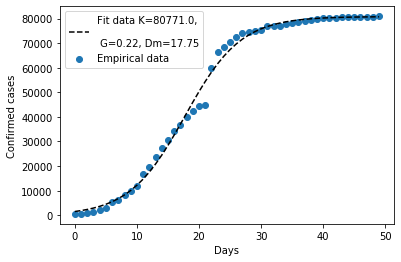

In [12]:
sp_country_df = country_df.loc['Mainland China']

confirm_cases = sp_country_df['Confirmed'].to_numpy()
days =  np.arange(len(confirm_cases))

def logit_fun(x,K,G,Dm ):
    return K/(1+np.exp(-G*(x-Dm)))

popt_logit, pcov_logit = curve_fit(logit_fun, 
            days, confirm_cases, 
            p0=[8e5,0.2,18])

fit_data = logit_fun(days, popt_logit[0], popt_logit[1], popt_logit[2])
nl='\n'
plt.scatter(days,confirm_cases,label='Empirical data')
plt.plot(days, fit_data, 'k--', label=f"""Fit data K={np.round(popt_logit[0])},
         {nl} G={np.round(popt_logit[1],2)}, Dm={np.round(popt_logit[2],2)}""")

plt.xlabel('Days'); plt.ylabel('Confirmed cases')
plt.legend()

print(f'Doubling event = {np.round(1+np.log(2)/popt_logit[1],2)}')

## Cases in US fits exponential growth curve

Doubling event = 3.38


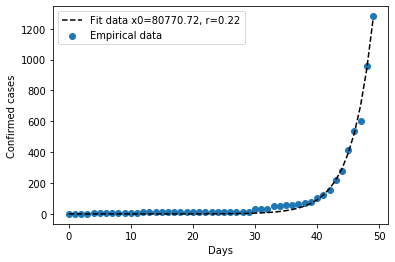

In [13]:
def exponential_fun(x,x0,r ):
    return x0*(1+r)**x

sp_country_df = country_df.loc['US']

confirm_cases = sp_country_df['Confirmed'].to_numpy()
days =  np.arange(len(confirm_cases))

popt_expo, pcov_expo = curve_fit(exponential_fun, 
            days, confirm_cases, 
            p0=[1,1])

fit_data = exponential_fun(days, popt_expo[0], popt_expo[1])
nl='\n'
plt.scatter(days,confirm_cases,label='Empirical data')
plt.plot(days, fit_data, 'k--',label=f"Fit data x0={np.round(popt_logit[0],2)}, r={np.round(popt_logit[1],2)}")

plt.xlabel('Days'); plt.ylabel('Confirmed cases')
plt.legend()

print(f'Doubling event = {1+np.round(np.log(2)/(np.log(1+popt_expo[1])),2)}')